### Implementing simple chatbot using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

/home/maniram/workspace/python/langchain-projects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-Cw4FUYqSwBclVJgVlZsIsjawOhntK', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba25a-6414-7f33-b94f-fe70ca8e8b22-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey, I am Krish and I like to play cricket")

AIMessage(content="<think>\nOkay, the user is Krish and he likes to play cricket. I should acknowledge his introduction and show interest in his hobby. Let me think about how to respond appropriately.\n\nFirst, I need to greet him back and mention that I'm glad to meet him. Then, since he mentioned cricket, I should ask him some follow-up questions to keep the conversation going. Maybe ask about his favorite team or what position he plays. That way, I can engage him further and learn more about his interests.\n\nWait, maybe I should also mention something about cricket to show I know a bit about it. Like talking about popular leagues or players. But I don't want to overdo it and come off as pushy. Keep it friendly and open-ended.\n\nAlso, check if there's anything else he wants to share. Encourage him to talk more about his experiences with cricket. Maybe ask if he plays often or has any favorite moments. That would help build a connection.\n\nLet me put it all together in a natural, c

In [7]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}


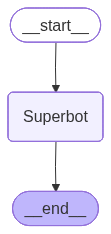

In [13]:
graph=StateGraph(State)

graph.add_node("Superbot",superbot)

#add edges

graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)


graph_builder = graph.compile(checkpointer=memory)

#Display
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
## Invocation
config={"configurable":{"thread_id":"1"}}
graph_builder.invoke({'messages':"Hi, my nam is Maniram and i like cricket"},config=config)

{'messages': [HumanMessage(content='Hi, my nam is Maniram and i like cricket', additional_kwargs={}, response_metadata={}, id='4bb0da00-ccf4-43aa-bbcd-6aed2ca7da85'),
  HumanMessage(content='Hi, my nam is Maniram and i like cricket', additional_kwargs={}, response_metadata={}, id='66526d58-404f-4d66-bb6e-b85a15390bbd'),
  HumanMessage(content='Hi, my nam is Maniram and i like cricket', additional_kwargs={}, response_metadata={}, id='284753d5-b390-43a3-98a6-637f6214c52e'),
  AIMessage(content='<think>\nOkay, the user has sent the same message three times now. Let me check the history. The first message was "Hi, my nam is Maniram and i like cricket" with a typo in "name". I responded by correcting the typo, greeting him, and asking about his favorite team. Then he repeated the same message again, so I asked if there was something specific he wanted to discuss about cricket. Now he\'s doing it a third time.\n\nHmm, maybe he\'s testing if the chatbot is responsive or if there\'s an issue w

## Streaming the rsponse with stream method

In [17]:
## Invocation
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"Hi, my nam is Maniram and i like cricket"},
                                  config=config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content='<think>\nOkay, the user introduced themselves as Maniram and mentioned they like cricket. The first thing I notice is that in their previous message, they wrote "my nam is" instead of "my name is." Now, they\'ve repeated the same typo. I should acknowledge their correction or maybe gently point it out in a friendly way.\n\nSince they\'re into cricket, I should respond in a way that shows enthusiasm and invites them to talk more. Maybe ask about their favorite teams or players. They might be looking for someone to discuss recent matches or strategies. Also, considering it\'s a follow-up message, they might be testing if the bot is paying attention. I should make sure to reference their previous message to show continuity.\n\nI should keep the tone positive and encouraging. Maybe use some cricket-related emojis to make it more engaging. Let me check if there are any recent cricket events that could be a topic of conversation. But since I don\

In [18]:
## Invocation
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"Hi, my nam is Maniram and i like cricket"},
                                  config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my nam is Maniram and i like cricket', additional_kwargs={}, response_metadata={}, id='bb196dba-2a12-4fec-b96a-388e380614ee'), AIMessage(content='<think>\nOkay, the user introduced themselves as Maniram and mentioned they like cricket. Let me start by greeting them and acknowledging their name. I should express enthusiasm about their interest in cricket and maybe ask a follow-up question to keep the conversation going. I need to make sure the response is friendly and engaging. Also, check for any typos or mistakes in the user\'s message. They wrote "Hi, my nam is Maniram," so I should correct "nam" to "name" politely. Overall, keep the tone positive and welcoming.\n</think>\n\nHello Maniram! It\'s great to meet you. 🏏 Cricket is such an exciting sport—I\'m glad you enjoy it! Do you follow any particular teams or players? Maybe you\'d like to share what you love most about the game? Let me know if you\'d like to discuss matches, strategies, or eve

In [19]:
for chunk in graph_builder.stream({'messages':"Hi, I also like football"},
                                  config=config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user mentioned they like cricket before and now they added they also like football. I need to acknowledge both interests. Let me start by welcoming them again. They corrected their name earlier, so maybe I should be friendly and not point out the typo again. They might be testing the response consistency.\n\nFirst, I should express excitement about their dual interests. Since they like both sports, maybe compare them in a fun way. Mentioning specific teams or players could engage them more. I should ask if they follow any particular teams or players in football. Also, maybe ask how they feel about the differences between cricket and football. That could lead to a deeper conversation. Need to keep the tone positive and encouraging. Make sure to invite them to share more about their preferences. Keep the response light and conversational. Avoid jargon but keep it knowledgeable. Check for any possible follow-up topics like r

In [20]:
for chunk in graph_builder.stream({'messages':"Hi, I love sports"},
                                  config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my nam is Maniram and i like cricket', additional_kwargs={}, response_metadata={}, id='bb196dba-2a12-4fec-b96a-388e380614ee'), AIMessage(content='<think>\nOkay, the user introduced themselves as Maniram and mentioned they like cricket. Let me start by greeting them and acknowledging their name. I should express enthusiasm about their interest in cricket and maybe ask a follow-up question to keep the conversation going. I need to make sure the response is friendly and engaging. Also, check for any typos or mistakes in the user\'s message. They wrote "Hi, my nam is Maniram," so I should correct "nam" to "name" politely. Overall, keep the tone positive and welcoming.\n</think>\n\nHello Maniram! It\'s great to meet you. 🏏 Cricket is such an exciting sport—I\'m glad you enjoy it! Do you follow any particular teams or players? Maybe you\'d like to share what you love most about the game? Let me know if you\'d like to discuss matches, strategies, or eve

In [23]:
config={"configurable":{"thread_id":"3"}}
async for event in graph_builder.astream_events({'messages':"Hi, I love sports"},
                                  config=config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi, I love sports'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019ba270-6738-78e3-b8cc-4478b2344454', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, I love sports', additional_kwargs={}, response_metadata={}, id='8b7778a1-3fd7-4828-b4c4-52fa0b9f5259'), AIMessage(content="<think>\nOkay, the user said they love sports. I need to respond in a friendly and engaging way. Let me start by acknowledging their interest. Maybe ask what specific sports they enjoy to keep the conversation going. I should also mention some popular sports to spark a discussion. Let me check if I have a natural tone and if there are any typos. Alright, that should work.\n</think>\n\nHi there! That's awesome - I'm always up for a great sports conversation! 🏀⚽ Do you have a favorite sport you like to play or watch? I'd love to hear what gets you excited about sports! Ma

{'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='', additional_kwargs={}, response_metadata={'model_provider': 'groq'}, id='lc_run--019ba270-6744-70a1-9cdd-6e2e66d9a501', tool_calls=[], invalid_tool_calls=[], tool_call_chunks=[])}, 'run_id': '019ba270-6744-70a1-9cdd-6e2e66d9a501', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 4, 'langgraph_node': 'Superbot', 'langgraph_triggers': ('branch:to:Superbot',), 'langgraph_path': ('__pregel_pull', 'Superbot'), 'langgraph_checkpoint_ns': 'Superbot:e3564a2a-bce2-ca1e-71f0-3d5998432c97', 'checkpoint_ns': 'Superbot:e3564a2a-bce2-ca1e-71f0-3d5998432c97', 'ls_provider': 'groq', 'ls_model_name': 'qwen/qwen3-32b', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['019ba270-6738-78e3-b8cc-4478b2344454', '019ba270-6740-7503-b3fa-cf9cc3cbe111']}
{'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='<think>', additional_kwargs={}, response_metadat